In [29]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('./beforecalving.csv',sep=',')

In [31]:
df

,cow,days,TP,ALB,BUN,TCHO,GOT,GGT,Ca,IP,GLU,NH3,NEFA,BHB
0,1,-20,7.5,2.6,10.2,97,61,19,9.4,6.4,32,153,101,698.0
1,3,-21,6.6,3.2,4.6,116,41,3,9.7,6.6,50,85,315,909.0
2,5,-31,6.8,2.9,5.4,105,53,4,7.9,9.1,42,125,575,1345.0
3,6,-28,7.8,3.5,10.1,128,48,18,8.7,6.5,59,100,557,596.0
4,7,-17,7.5,2.7,8.5,96,39,9,8.6,6.1,53,112,213,407.0
5,7,-25,7.2,3.0,14.2,102,47,14,9.5,7.6,54,104,137,542.7
6,8,-17,6.7,2.9,3.1,127,65,5,8.1,7.9,59,119,0,0.0
7,9,-43,6.5,2.8,3.7,85,37,20,9.0,6.4,69,77,128,584.2
8,10,-13,7.4,3.6,4.1,81,72,8,9.1,5.0,39,153,127,390.0
9,11,-32,6.7,2.7,8.3,88,57,8,8.9,7.4,57,70,77,412.0


In [32]:
df_tr = df

In [33]:
#Standardize
#Calculate the z score of each value in the sample, 
#relative to the sample mean and standard deviation.
clmns = ['days','TP','ALB','BUN','TCHO','GOT', 'GGT', 'Ca','IP','GLU','NH3', 'NEFA','BHB']
df_tr_std = stats.zscore(df_tr[clmns])

In [34]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_


In [35]:
df_tr['clusters'] = labels

In [36]:
clmns.extend(['clusters'])


In [38]:
mean = df_tr[clmns].groupby(['clusters']).mean()

In [40]:
mean.to_csv('./meanbefore.csv')

In [52]:
std = df_tr[clmns].groupby(['clusters']).std()


In [53]:
std.to_csv('./std1.csv')

In [72]:
df_tr.to_csv('./beforeclust.csv')

Text(26.6627,0.5,'BUN')

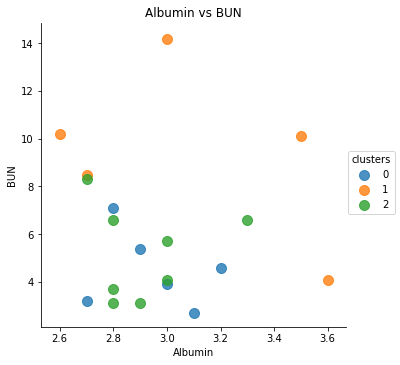

In [51]:
#Scatter plot of Wattage and Duration
ax = sns.lmplot('ALB', 'BUN', 
          data=df_tr, 
         fit_reg=False, 
        hue="clusters",  
       scatter_kws={"marker": "D", 
                   "s": 100})


plt.title('Albumin vs BUN')
plt.xlabel('Albumin')
plt.ylabel('BUN')


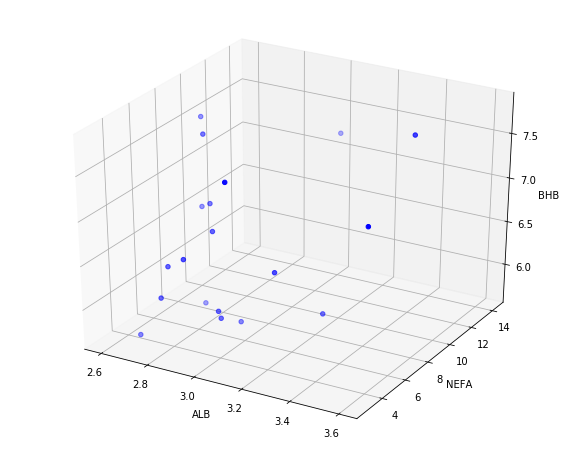

In [71]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111,projection='3d')

x= (df_tr.ALB)
y= (df_tr.BUN)
z= (df_tr.TP)

ax1.scatter(x,y,z, c=['blue'])
ax1.set_xlabel('ALB')
ax1.set_ylabel('NEFA')
ax1.set_zlabel('BHB')
plt.show()

